<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/AVH_Car_Rental_scaling_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
#Importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [22]:
# Read the Training Data
train_data = pd.read_csv("/content/drive/MyDrive/AV_Car_rental/train_E1GspfA.csv")

In [23]:
train_data.shape

(18247, 3)

In [24]:
train_data.head()

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


In [26]:
train_data.isnull().sum()

date      0
hour      0
demand    0
dtype: int64

In [27]:
train_data.corr()

,hour,demand
hour,1.000000,0.161498
demand,0.161498,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


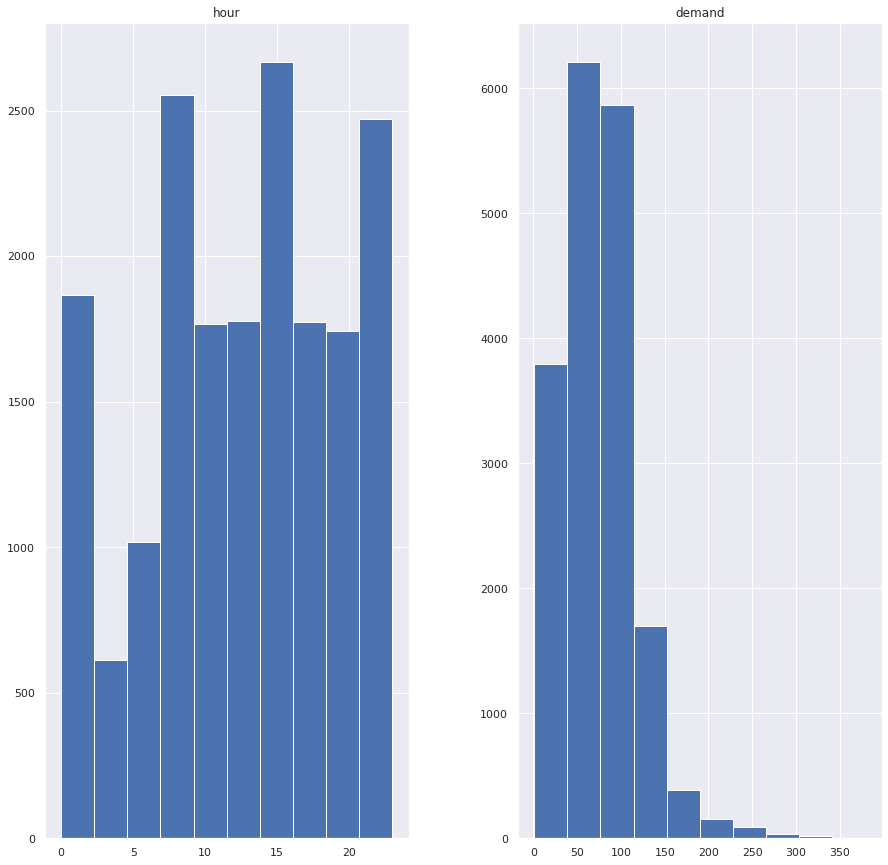

In [28]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = train_data.hist(ax=ax)

In [29]:
''' Since it is string value, we extract date alone from the existing column
by creating the new column '''

train_data["travel_day"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.day

In [30]:
''' Since it is string value, we extract month alone from the existing column
by creating the new column '''

train_data["travel_month"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.month

In [31]:
''' Since it is string value, we extract year alone from the existing column
by creating the new column '''

train_data["travel_year"] = pd.to_datetime(train_data.date, format="%Y-%m-%d").dt.year

In [32]:
# Since we have converted date column into integers, Now we can drop as it is of no use.

train_data.drop(["date"], axis = 1, inplace = True)

In [33]:
train_data.head()

,hour,demand,travel_day,travel_month,travel_year
0,9,91,18,8,2018
1,10,21,18,8,2018
2,13,23,18,8,2018
3,14,104,18,8,2018
4,15,81,18,8,2018


In [34]:
train_data.drop(["travel_year"], axis = 1, inplace = True)

In [35]:
train_data.head()

,hour,demand,travel_day,travel_month
0,9,91,18,8
1,10,21,18,8
2,13,23,18,8
3,14,104,18,8
4,15,81,18,8


In [93]:
train_data[["hour"]].value_counts()

hour
16      892
15      890
17      889
13      889
12      888
14      886
18      884
10      884
11      883
19      878
9       878
8       870
20      864
21      858
22      837
7       806
23      776
0       726
6       679
1       587
2       553
5       338
4       325
3       287
dtype: int64

In [36]:
###Splitting X and Y
X = train_data.loc[:, ['hour','travel_day','travel_month']]
Y = train_data['demand']

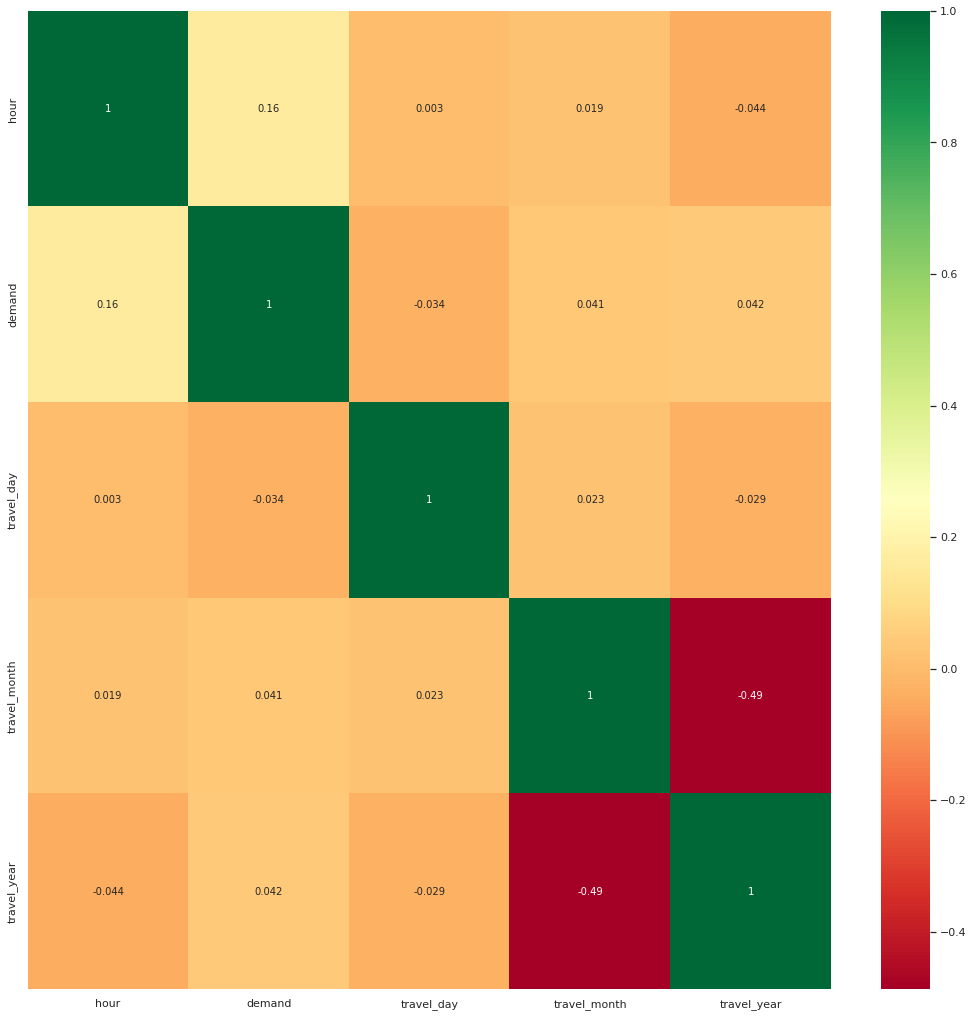

In [17]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [18]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [19]:
print(selection.feature_importances_)

[0.21166768 0.54146118 0.19284518 0.05402596]


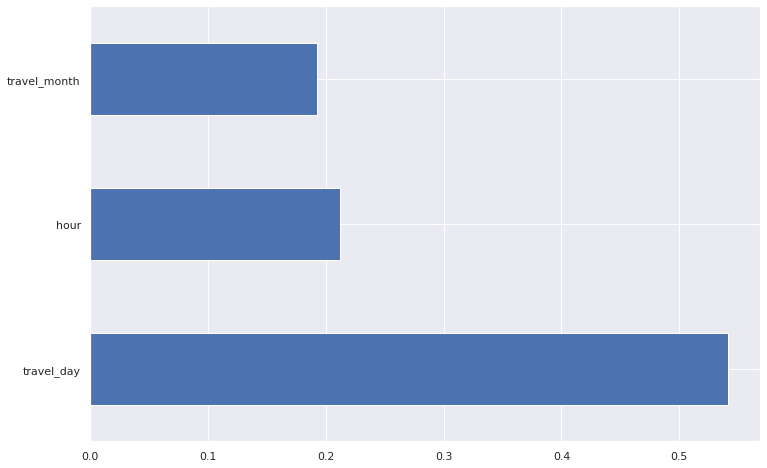

In [20]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [37]:
###Splitting X and Y. Ignoring Least Important Column
X = train_data.loc[:, ['hour','travel_day','travel_month']]
Y = train_data['demand']

In [22]:
train_data['hour'].value_counts()

16    892
15    890
13    889
17    889
12    888
14    886
18    884
10    884
11    883
9     878
19    878
8     870
20    864
21    858
22    837
7     806
23    776
0     726
6     679
1     587
2     553
5     338
4     325
3     287
Name: hour, dtype: int64

In [23]:
train_data['travel_month'].value_counts()

1     1963
11    1837
2     1826
10    1798
9     1603
8     1406
12    1394
3     1346
5     1321
6     1281
4     1258
7     1214
Name: travel_month, dtype: int64

In [24]:
train_data['travel_day'].value_counts()

27    615
17    614
10    611
19    610
18    609
23    607
8     607
22    607
12    607
16    604
9     604
21    602
13    602
11    602
15    601
26    600
28    599
25    597
14    596
1     594
24    594
2     593
7     590
20    590
6     590
5     587
3     582
4     577
29    563
30    529
31    364
Name: travel_day, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [39]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(13685, 3)
(4562, 3)
(13685,)
(4562,)


In [40]:
#Try with Linear Regression

from sklearn.linear_model import LinearRegression
Linear_Reg = LinearRegression()
Linear_Reg.fit(x_train, y_train)

LinearRegression()

In [41]:
y_pred_lr = Linear_Reg.predict(x_test)

In [42]:
from sklearn import metrics

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))

MAE: 31.334730169640945
MSE: 1633.4086199473297
RMSE: 40.41545026283055


In [44]:
lr_test_rmse = []
random_state = range(1,100,10)

for i in random_state:
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    Linear_Reg.fit(x_train,y_train)
    Y_pred_LR = Linear_Reg.predict(x_test)
    lr_test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_LR)))
    
print(lr_test_rmse)

[40.315121670334364, 40.90286053700679, 40.768906633153556, 41.15554231336735, 41.09709237987521, 41.094614767651834, 41.49904116258738, 40.404903207866646, 41.432398630278286, 41.050678058237615]


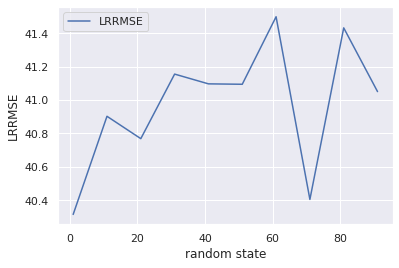

In [45]:
plt.plot(random_state,lr_test_rmse, label = "LRRMSE")
plt.ylabel("LRRMSE")
plt.xlabel("random state")
plt.legend()

In [50]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion = "mse", max_depth = 7)
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [51]:
print('DT_MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('DT_MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('DT_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))

DT_MAE: 29.193882479984154
DT_MSE: 1318.1166613661494
DT_RMSE: 36.305876402672745


In [48]:
dt_test_rmse =[]
for i in range(1, 11):
    dt_para = DecisionTreeRegressor(max_depth=i)
    dt_para.fit(x_train,y_train)
    y_pred_dt_para = dt_para.predict(x_test)
    dt_test_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt_para)))
print(dt_test_rmse)

[40.128273331081196, 39.16583533419426, 38.28016443865665, 37.74136304554364, 37.099423698111465, 36.365098473986585, 36.305876402672745, 36.511469828623, 36.84411162780912, 37.75323895902306]


Text(0.5, 1.0, 'Decision Tree Regressor scores for different depth values')

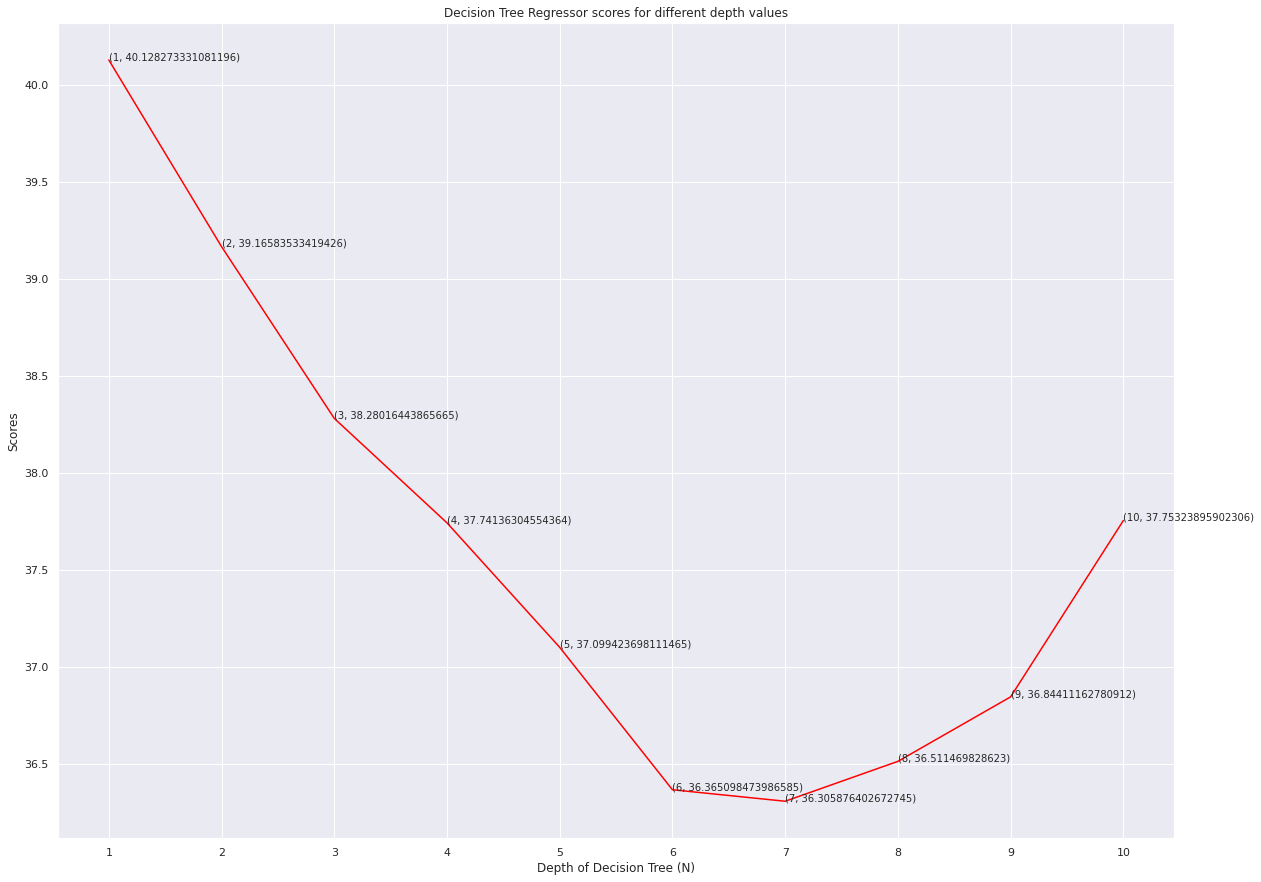

In [49]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], dt_test_rmse, color = 'red')
for i in range(1,11):
    plt.text(i, dt_test_rmse[i-1], (i, dt_test_rmse[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Regressor scores for different depth values')

Decision Tree regressor rmse with max_depth=7 is: 35.93533504


In [53]:
dt.tree_.node_count

253

In [54]:
dt.tree_.max_depth

7

Bagging

In [55]:
from sklearn.ensemble import BaggingRegressor

base_estimator = dt, max_samples = 0.5

In [60]:
bag = BaggingRegressor(base_estimator = dt, max_samples = 0.6)
bag.fit(x_train,y_train)
Y_pred_bag = bag.predict(x_test)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, Y_pred_bag))
print('MSE:', metrics.mean_squared_error(y_test, Y_pred_bag))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))

MAE: 28.896399101744336
MSE: 1282.4453063773985
RMSE: 35.81124552954558


In [58]:
bag_rmse = []
ms = np.arange(0.1,1,0.1)
for i in ms:
    bag = BaggingRegressor(base_estimator = dt, max_samples = i)
    bag.fit(x_train,y_train)
    Y_pred_bag = bag.predict(x_test)
    bag_rmse.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))
print(bag_rmse)

[36.2777194507781, 36.067377241380285, 35.595831819401376, 35.691180005891226, 35.58791237285283, 35.572130870691666, 35.642368483161775, 35.662147367996454, 35.56522431161935]


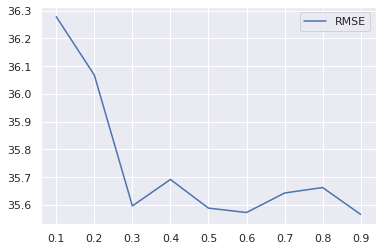

In [59]:
# Plotting the results of Random_Forest
plt.plot(ms,bag_rmse,label = "RMSE")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


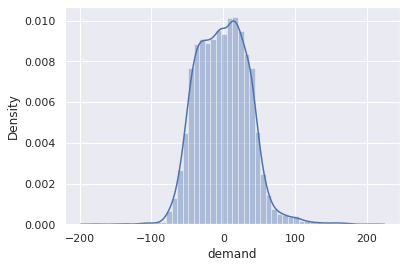

In [62]:
sns.distplot(y_test-Y_pred_bag)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(max_features = 0.4, n_estimators = 31)
reg_rf.fit(x_train, y_train)

RandomForestRegressor(max_features=0.4, n_estimators=31)

In [64]:
y_pred_rf = reg_rf.predict(x_test)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

MAE: 32.71139725198452
MSE: 1720.0996798213955
RMSE: 41.4740844362042


In [66]:
rf_score = []
mf = np.arange(0.1,1,0.1)
for i in mf:
    RF = RandomForestRegressor(max_features = i, n_estimators = 30)
    RF.fit(x_train,y_train)
    Y_pred_rf = RF.predict(x_test)
    rf_score.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_rf)))    
print(rf_score)

[41.62668467788932, 41.42706457567185, 41.363887509239234, 41.601753393098974, 41.463527487357396, 41.4991220705642, 41.53156850117403, 41.491931941366566, 41.516056706084164]


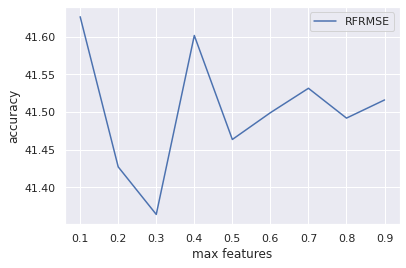

In [67]:
plt.plot(mf,rf_score,label = "RFRMSE")
plt.ylabel("accuracy")
plt.xlabel("max features")
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


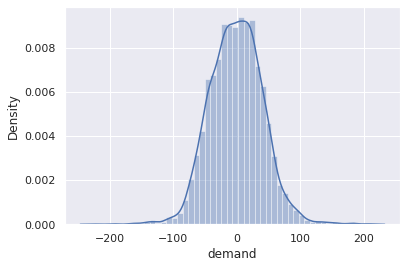

In [68]:
sns.distplot(y_test-y_pred_rf)
plt.show()

**Ada Boost**

In [73]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(base_estimator = dt, n_estimators = 10)
adb.fit(x_train,y_train)
Y_pred_adb = adb.predict(x_test)

In [74]:
print('ADB_MAE:', metrics.mean_absolute_error(y_test, Y_pred_adb))
print('ADB_MSE:', metrics.mean_squared_error(y_test, Y_pred_adb))
print('ADB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_adb)))

ADB_MAE: 29.0852681735013
ADB_MSE: 1290.9692864982937
ADB_RMSE: 35.930061042228886


In [71]:
adb_rmsescore = []
est = range(1,100,10)
for i in est:
    adb = AdaBoostRegressor(base_estimator = dt, n_estimators = i)
    adb.fit(x_train,y_train)
    y_pred_adb = adb.predict(x_test)
    adb_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_adb)))    

print(adb_rmsescore)

[36.6659493640876, 36.31075586330643, 36.44800728559812, 36.45427467905039, 36.40238834450262, 36.32446799023163, 36.57101439610629, 36.52331477637832, 36.390064048654324, 36.44327983074009]


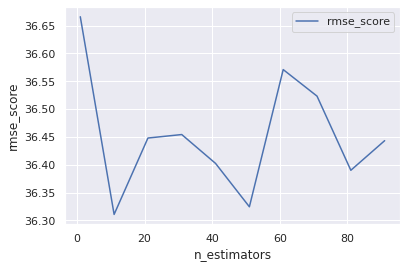

In [72]:
plt.plot(est,adb_rmsescore,label = "rmse_score")
plt.ylabel("rmse_score")
plt.xlabel("n_estimators")
plt.legend()

**GradientBoosting**

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.39999999959)
gbr.fit(x_train,y_train)
y_pred_gbr = gbr.predict(x_test)

In [119]:
print('GRB_MAE:', metrics.mean_absolute_error(y_test, y_pred_gbr))
print('GRB_MSE:', metrics.mean_squared_error(y_test, y_pred_gbr))
print('GRB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))

GRB_MAE: 28.874058294036466
GRB_MSE: 1271.5324249263258
GRB_RMSE: 35.65855332071572


In [120]:
grb_rmsescore = []
setting = np.arange(0.01,0.2,0.01)
for i in setting:
    grb = GradientBoostingRegressor(n_estimators = 100, learning_rate = i)
    grb.fit(x_train,y_train)
    y_pred_grb = grb.predict(x_test)
    grb_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_grb)))    

print(grb_rmsescore)

[38.58016054984073, 37.670767635526786, 37.08225860465106, 36.79433131963122, 36.55595785718237, 36.38431239616684, 36.2947200193258, 36.24323710208226, 36.13469573248571, 36.10803512443055, 36.04561764111216, 36.026160409131606, 35.97549018392128, 35.90719653042819, 35.87122097237787, 35.88551252121976, 35.85207999595996, 35.84448696757034, 35.82260540567711]


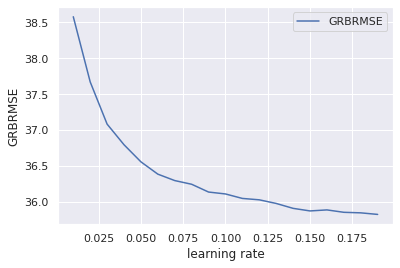

In [79]:
plt.plot(setting,grb_rmsescore,label = "GRBRMSE")
plt.ylabel("GRBRMSE")
plt.xlabel("learning rate")
plt.legend()

**XG Boost**

In [135]:
from xgboost import XGBRegressor
XG = XGBRegressor(learning_rate = 0.145, gamma = 0, reg_lambda = 1, n_estimators = 25)
XG.fit(x_train,y_train)
y_pred_XG = XG.predict(x_test)

[10:43:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [136]:
print('XG_MAE:', metrics.mean_absolute_error(y_test, y_pred_XG))
print('XG_MSE:', metrics.mean_squared_error(y_test, y_pred_XG))
print('XG_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)))

XG_MAE: 29.23740601282686
XG_MSE: 1354.695365756576
XG_RMSE: 36.80618651472298


In [129]:
XG_rmsescore = []
est = range(1,100,10)
for i in est:
    XG = XGBRegressor(learning_rate = 0.14, gamma = 0, reg_lambda = 1, n_estimators = i)
    XG.fit(x_train,y_train)
    Y_pred_XG = XG.predict(x_test)
    XG_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, Y_pred_XG)))    

print(XG_rmsescore)

[10:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:42:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

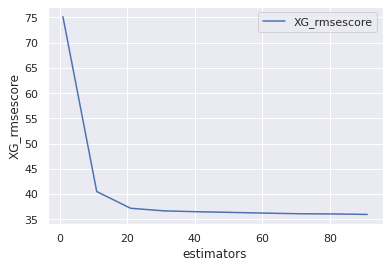

In [130]:
plt.plot(est,XG_rmsescore,label = "XG_rmsescore")
plt.ylabel("XG_rmsescore")
plt.xlabel("estimators")
plt.legend()

In [140]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=21, p=2)
knn_reg.fit(x_train,y_train)
y_pred_knn = knn_reg.predict(x_test)

In [138]:
knn_rmsescore =[]
est = range(1, 21)
for i in est:
    knn =KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    knn_rmsescore.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))    
print(knn_rmsescore)

[51.27418818888529, 44.48550120378097, 41.15602294016817, 39.70744325977575, 38.48523664042364, 38.023163185219644, 37.52396025148452, 37.25330120059785, 37.044382538965586, 36.82453440637879, 36.66735782174021, 36.63618583977949, 36.66557670914691, 36.71501673210827, 36.593988799192324, 36.618061401510516, 36.68238534896918, 36.59019061384109, 36.64250223179852, 36.68153487051245]


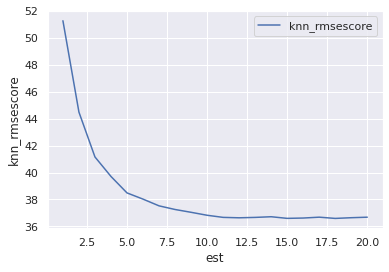

In [139]:
plt.plot(est,knn_rmsescore,label = "knn_rmsescore")
plt.ylabel("knn_rmsescore")
plt.xlabel("est")
plt.legend()

In [141]:
print('KNN_MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('KNN_MSE:', metrics.mean_squared_error(y_test, y_pred_knn))
print('KNN_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

KNN_MAE: 29.517921287236355
KNN_MSE: 1347.2211983971672
KNN_RMSE: 36.704511962389134


In [142]:
print('XG_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)))
print('GRB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)))
print('ADB_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_adb)))
print('RF_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('BAG_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred_bag)))
print('DT_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))
print('KNN_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

XG_RMSE: 36.80618651472298
GRB_RMSE: 35.65855332071572
ADB_RMSE: 35.930061042228886
RF_RMSE: 41.4740844362042
BAG_RMSE: 35.81124552954558
DT_RMSE: 36.305876402672745
KNN_RMSE: 36.704511962389134


In [176]:
# Read the Test Data
test_data = pd.read_csv("/content/drive/MyDrive/AV_Car_rental/test_6QvDdzb.csv")

In [177]:
test_data.head()

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


In [145]:
test_data.isnull().sum()

date    0
hour    0
dtype: int64

In [146]:
test_data["travel_day"] = pd.to_datetime(test_data.date, format="%Y-%m-%d").dt.day
test_data["travel_month"] = pd.to_datetime(test_data.date, format="%Y-%m-%d").dt.month
test_data["travel_year"] = pd.to_datetime(test_data.date, format="%Y-%m-%d").dt.year
test_data.drop(["date"], axis = 1, inplace = True)

In [147]:
X = test_data.loc[:, ['hour','travel_day','travel_month','travel_year']]

In [148]:
X.head()

,hour,travel_day,travel_month,travel_year
0,0,1,3,2021
1,1,1,3,2021
2,2,1,3,2021
3,3,1,3,2021
4,5,1,3,2021


In [149]:
test_x = test_data.loc[:, ['hour','travel_day','travel_month']]

In [150]:
bag = BaggingRegressor(base_estimator = dt, max_samples = 0.6)
bag.fit(x_train,y_train)
Y_pred_bag_test = bag.predict(test_x)

In [151]:
Y_pred_bag_test

array([56.23264707, 53.0060317 , 53.66097804, ..., 86.26656275,
       62.54390336, 61.91238538])

**ANN**

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [155]:
model= Sequential()
model.add(Dense(3,activation='relu',name='input'))
model.add(Dense(5,activation='relu',name='hidden'))
model.add(Dense(1,name='output'))

In [156]:
model.compile(loss='mse', optimizer='adam')

In [157]:
model.fit(x =x_train, y= y_train, validation_data=(x_test,y_test), batch_size=2000, epochs=500, verbose=0)

In [158]:
losses = pd.DataFrame(model.history.history)

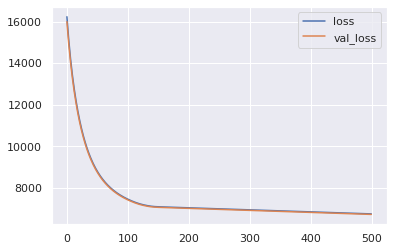

In [159]:
losses[['loss','val_loss']].plot()

In [160]:
y_pred_ann = model.predict(x_test)


In [161]:
print('ANN_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ann)))

ANN_RMSE: 81.96696708628812


In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [163]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [164]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [165]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [166]:
rf_random.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=0.4,
                                                   n_estimators=31),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [167]:
rf_random.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 900}

In [168]:
y_prediction_rf = rf_random.predict(x_test)

In [169]:
print('RF_RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction_rf)))

RF_RMSE: 35.40310634825197


In [170]:
y_pred_test_rf = rf_random.predict(test_x)

In [171]:
sub =pd.DataFrame(y_pred_test_rf)

In [178]:
submission = pd.concat([test_data, sub], axis=1)

In [179]:
submission.head() 

,date,hour,0
0,2021-03-01,0,63.551925
1,2021-03-01,1,56.688686
2,2021-03-01,2,53.201694
3,2021-03-01,3,53.888912
4,2021-03-01,5,50.540506


In [180]:
 submission.columns

Index(['date', 'hour', 0], dtype='object')

In [181]:
submission.columns =['date', 'hour', 'demand']

In [182]:
submission.head()

,date,hour,demand
0,2021-03-01,0,63.551925
1,2021-03-01,1,56.688686
2,2021-03-01,2,53.201694
3,2021-03-01,3,53.888912
4,2021-03-01,5,50.540506


In [183]:
submission.to_csv(r'/content/drive/MyDrive/AV_Car_rental/Rf_Final_sub1.csv', index = False)